# <font color='056938'> **Librerias** </font>

In [13]:
!pip install keras-tuner

In [14]:
!pip install -q tensorflow

In [15]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


#Red neuronal
from tensorflow import keras
import tensorflow as tf
from sklearn import metrics
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import keras_tuner as kt


In [16]:
drive.mount('/content/drive')
#Define la parte del directorio que quieres trabajar
path = "/content/drive/MyDrive/Mod2/Salud"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Ruta al archivo
ruta = '/content/drive/MyDrive/Mod2/Salud/data/df_limpia.xlsx'

# Leer excel
df = pd.read_excel(ruta)
df

,Embarazos,Glucosa,Presión Sanguínea,Espesor de la Piel,Insulina,IMC,Función de Pedigrí de Diabetes,Edad,Diagnostico
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627000,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351000,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672000,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167000,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,0.416104,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171000,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340000,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245000,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349000,47,1


In [18]:
sys.path.append(path)

from b_preprocesamiento import preparar_datos #Importar función que contiene los datos de entrenamiento, test y validación

In [19]:
X_train, X_val, X_test, y_train, y_val, y_test = preparar_datos(df)

<font color='056938'> **Análisis del modelo ganador**</font>

In [20]:
### cargar modelo

modelo_ganador=tf.keras.models.load_model('/content/drive/MyDrive/Mod2/Salud/salidas/best_model.keras')
test_loss, test_auc = modelo_ganador.evaluate(X_test, y_test)
print(f"\Mejor AUC on test set: {test_auc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7516 - loss: 0.6370 
\Mejor AUC on test set: 0.7532


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Text(0.5, 0, 'Probabilidad de tener diabetes')

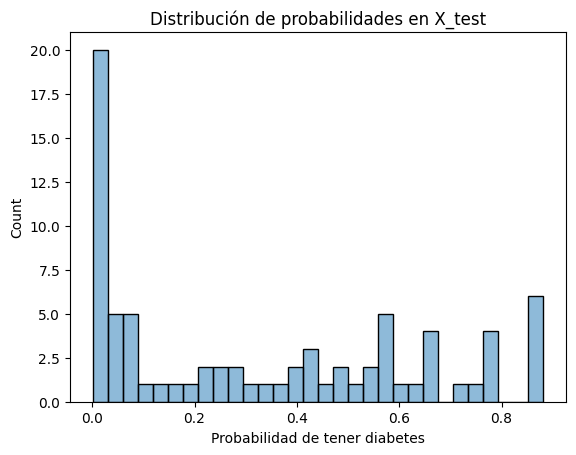

In [21]:
####probabilidades en test #######

prob=modelo_ganador.predict(X_test)
sns.histplot(prob, legend=False, bins=30)
plt.title("Distribución de probabilidades en X_test")
plt.xlabel("Probabilidad de tener diabetes")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Text(0.5, 0, 'Probabilidad de tener diabetes')

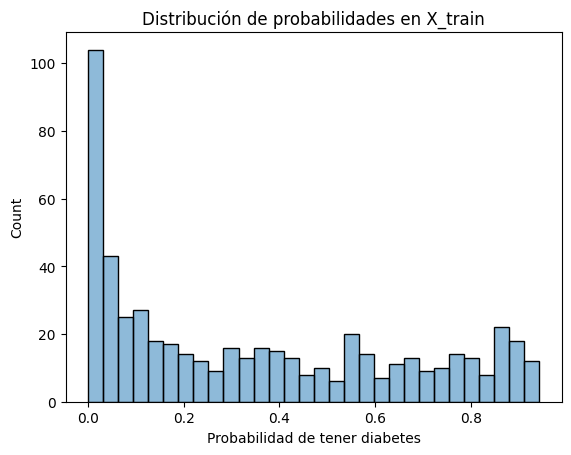

In [22]:
### probabilidades en entrenamiento #####
prob1=modelo_ganador.predict(X_train)
sns.histplot(prob1, legend=False, bins=30)
plt.title("Distribución de probabilidades en X_train")
plt.xlabel("Probabilidad de tener diabetes")

Se observaron agrupaciones de predicciones cercanas a 0 y a 1, lo que sugiere que el modelo tiene alta confianza en muchas de sus predicciones.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       349
           1       0.75      0.72      0.74       188

    accuracy                           0.82       537
   macro avg       0.80      0.80      0.80       537
weighted avg       0.82      0.82      0.82       537

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        52
           1       0.62      0.64      0.63        25

    accuracy                           0.75        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.76      0.75      0.75        77



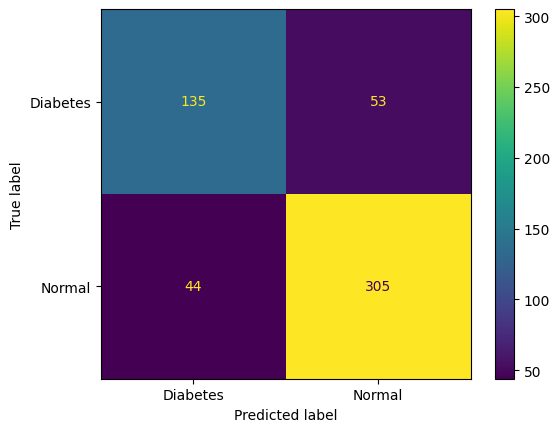

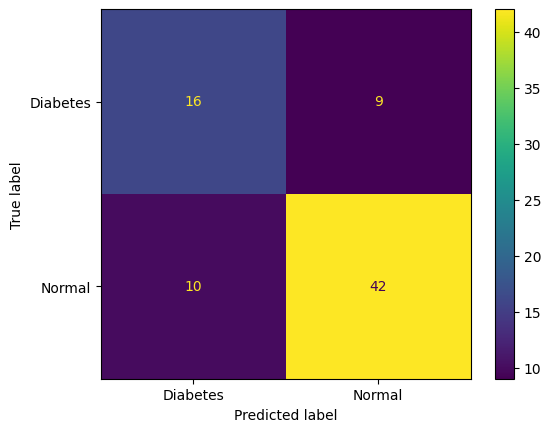

In [23]:
#Priorizar la predicción de los diabeticos
threshold_diabetes=0.5

pred_train=(modelo_ganador.predict(X_train)>=threshold_diabetes).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Diabetes','Normal'])
disp.plot()


pred_test=(modelo_ganador.predict(X_test)>=threshold_diabetes).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Diabetes','Normal'])
disp.plot()

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       349
           1       0.82      0.60      0.69       188

    accuracy                           0.81       537
   macro avg       0.81      0.76      0.78       537
weighted avg       0.81      0.81      0.80       537

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.61      0.44      0.51        25

    accuracy                           0.73        77
   macro avg       0.69      0.65      0.66        77
weighted avg       0.71      0.73      0.71        77



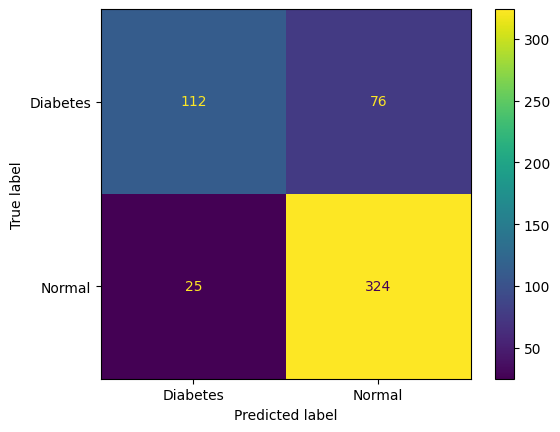

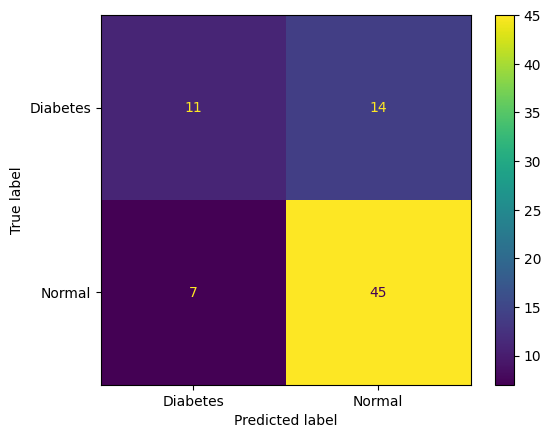

In [24]:
#Priorizar la predicción de los diabeticos
threshold_diab=0.6

pred_train=(modelo_ganador.predict(X_train)>=threshold_diab).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Diabetes','Normal'])
disp.plot()


pred_test=(modelo_ganador.predict(X_test)>=threshold_diab).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Diabetes','Normal'])
disp.plot()

Como estamos en busca de un umbral para diagnóstico temprano, esto significa detectar la mayoría de los casos reales de diabetes, aunque eso implique cometer algunos errores (falsos positivos).Porque no diagnosticar a una persona que sí tiene diabetes puede traer consecuencias graves a largo plazo (ceguera, amputaciones, infartos).

Se evidencia que al utilizar un valor de threshold_diabetes de 0.5 para predecir la presencia de diabetes, se identifica una mayor cantidad de pacientes de manera automatica con esta condición en comparación con un threshold de 0.6. Esto sugiere que no resulta conveniente probar con valores más altos, ya que tienden a reducir significativamente la detección de casos positivos.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        52
           1       0.51      0.72      0.60        25

    accuracy                           0.69        77
   macro avg       0.67      0.70      0.67        77
weighted avg       0.73      0.69      0.70        77



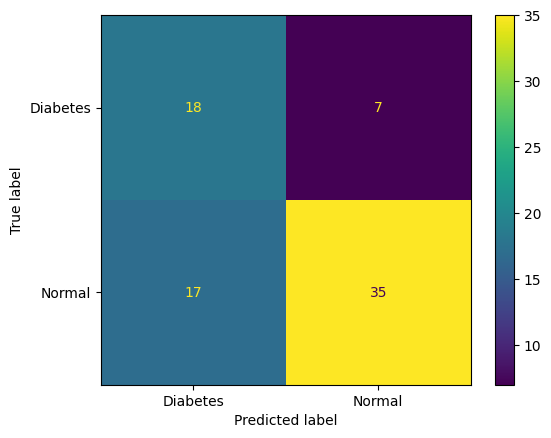

In [25]:
#Priorizar la predicción de los no diabeticos
threshold_no_diabetes=0.35

pred_test=(modelo_ganador.predict(X_test)>=threshold_no_diabetes).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Diabetes', 'Normal'])
disp.plot()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
              precision    recall  f1-score   support

           0       0.85      0.54      0.66        52
           1       0.45      0.80      0.58        25

    accuracy                           0.62        77
   macro avg       0.65      0.67      0.62        77
weighted avg       0.72      0.62      0.63        77



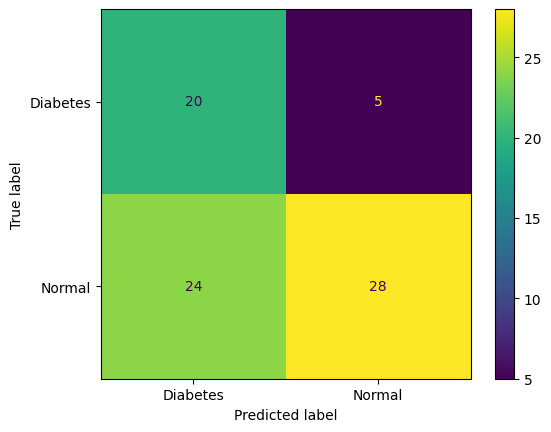

In [26]:
#Priorizar la predicción de los no diabeticos
threshold_no_diabetes=0.2

pred_test=(modelo_ganador.predict(X_test)>=threshold_no_diabetes).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Diabetes', 'Normal'])
disp.plot()

También se busca que el modelo identifique correctamente la mayor cantidad posible de personas que realmente no tienen diabetes, es decir, que las clasifique como "normales". Esto es importante porque si se predice erróneamente que una persona sin diabetes es diabética, se generarían exámenes médicos innecesarios, lo que implica costos adicionales en tiempo y recursos.

Por esta razón, se observa que al utilizar un threshold_no_diabetes de 0.35 para clasificar a los pacientes sin diabetes, se obtienen mejores resultados en la identificación correcta de los casos normales. En cambio, con valores de threshold_no_diabetes más bajos, el número de predicciones correctas para pacientes sin diabetes disminuye.

In [27]:
prob=modelo_ganador.predict(X_test)

threshold_diabetes=0.5
threshold_no_diabetes= 0.35

clas=['Diabetes' if prob >threshold_diabetes else 'Normal' if prob < threshold_no_diabetes else "No ident" for prob in prob]

# Cálculo de frecuencias por clase
clases, count = np.unique(clas, return_counts=True)

# Porcentaje de cada clase
porcentajes = count * 100 / np.sum(count)

# Mostrar los nombres con sus porcentajes
for c, p in zip(clases, porcentajes):
    print(f"{c}: {p:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Diabetes: 33.77%
No ident: 11.69%
Normal: 54.55%


Se observa que el porcentaje de pacientes no identificados es muy bajo, lo que indica que el modelo logra clasificar de forma automática la mayoría de los casos tanto diabéticos como normales.